# Lyrics Generator - LSTM Layer - March 2021

Setup

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint

import numpy as np
import random
import io

Preparing the data

In [2]:
f = open("sheeran_john_lyrics.txt", "r")
text = f.read().lower()

text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 30
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Corpus length: 951850
Total chars: 80
Number of sequences: 951820


Build the model: a LSTM layer + Dropout layer

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        layers.LSTM(128),
        layers.Dropout(0.2),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
#optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer='adam')

Text sampling function

In [4]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Train the model

In [5]:
epochs = 40
batch_size = 128

loss = []
lyrics = []

# define the checkpoint
filepath="weights-improvement-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

for epoch in range(epochs):
    history = model.fit(x, y, batch_size=batch_size, epochs=1, callbacks=callbacks_list)
    loss.append(history.history['loss'])
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.4]:
        print("...Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]
        orig_sentence = sentence
        print('...Generating with seed: "' + sentence + '"')

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("...Generated: ", generated)
        print()
        lyrics.append(orig_sentence + generated)

7437/7437 [==============================] - 102s 10ms/step - loss: 2.4085

Epoch 00001: loss improved from inf to 2.16926, saving model to weights-improvement-2.1693.hdf5

Generating text after epoch: 0
...Diversity: 0.4
...Generating with seed: "rong? black liz, a huge rooste"
...Generated:  r of the shes the string and her thing the got to she to the down i am a will i wan the shand in the cars and the bat as the goon the sand i sown for the love we is he you are i am the way the back i was i will cain the stone get i want is i am she to but you aid the feel sean on the roon i am she it i head i was go not gram the sing to frough a do not get you be the will the the some the car some

7437/7437 [==============================] - 72s 10ms/step - loss: 1.8539

Epoch 00001: loss improved from 2.16926 to 1.85394, saving model to weights-improvement-1.8539.hdf5

Generating text after epoch: 1
...Diversity: 0.4
...Generating with seed: " my advice, take the next flig"
...Generated:  ht th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


...Generated:  an i think i am a silent of a coming day of the wind with my band street it is a come in your heart and the bitch of the tears and the man of the days i will say a did and i want to know the sading of the way the first little some day i do not wanna go on with you like that we see the sand i am from the sky when i am a man and the same is a blooding to love we will be a little bit with enter and c

7437/7437 [==============================] - 73s 10ms/step - loss: 1.4387

Epoch 00001: loss improved from 1.44337 to 1.43872, saving model to weights-improvement-1.4387.hdf5

Generating text after epoch: 23
...Diversity: 0.4
...Generating with seed: "le to others the few francs we"
...Generated:   could looked with the sun in the call beneath the way i do not be the start said the same would like the start when i would like to set to be start she was not way you are not we are too beant to find me and i would like to be and it is not got you be the veing on the stars i am shi

Save the lyrics generated for each epoch

In [6]:
text = ""
i = 1
for sentence in lyrics:
    text += ("Epoch " + str(i) + ": ")
    text += sentence
    text += "\n"
    i += 1

f = open("generated_lyrics.txt", "w")
f.write(text)
f.close()

In [1]:
loss = [2.169255495071411,
 1.8539432287216187,
 1.7414838075637817,
 1.6746668815612793,
 1.6296756267547607,
 1.597072720527649,
 1.5718945264816284,
 1.5517178773880005,
 1.5354578495025635,
 1.5222922563552856,
 1.5102260112762451,
 1.5003712177276611,
 1.4917728900909424,
 1.4837214946746826,
 1.4773075580596924,
 1.471287727355957,
 1.4665898084640503,
 1.4610834121704102,
 1.4566445350646973,
 1.452731728553772,
 1.4490548372268677,
 1.4454107284545898,
 1.4433684349060059,
 1.438715934753418,
 1.4366194009780884,
 1.4337952136993408,
 1.4313877820968628,
 1.4287751913070679,
 1.4273289442062378,
 1.4254627227783203,
 1.4233325719833374,
 1.4221727848052979,
 1.4202240705490112,
 1.4186313152313232,
 1.4179480075836182,
 1.4195438623428345,
 1.4170284271240234,
 1.4149377346038818,
 1.4133071899414062,
 1.4113527536392212]

Plot loss metric evolution during Model Training

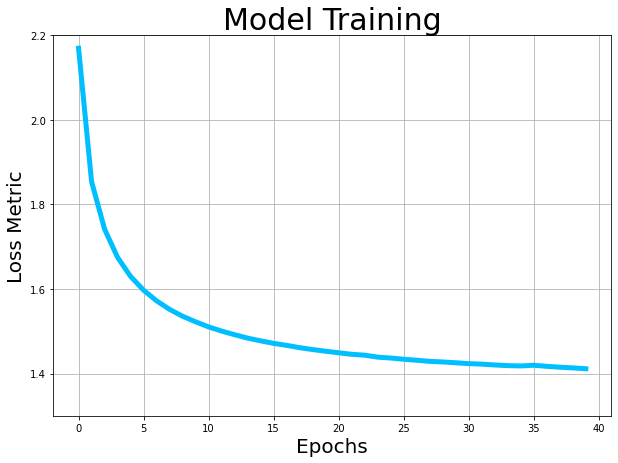

In [18]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title('Model Training', fontsize=30)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel('Loss Metric', fontsize=20)
ax.plot(range(40), loss, c='deepskyblue', linewidth=5.0)
plt.grid(True)
plt.gca().set_ylim(1.3, 2.2) # set the vertical range to [0-2]
plt.savefig('loss_evolution_30epochs.png', transparent=False)

Save model

In [11]:
model.save('../models/lyrics_generator/model_song_generator_improved.h5')

Load model to used in the future

In [19]:
new_model = keras.models.load_model('../models/lyrics_generator/model_song_generator_improved.h5')